In [1]:
import pandas as pd 

from porise.model.algorithms.cmab import HybridLinUCBUER
from porise.envs.real.real_env import RealEnv
from porise import Simulator

### Step-1: Load dataset

In [2]:
df = pd.read_csv('../porise/data/exp5217_all_imp100_scaled_train_new.csv')
print("cdna user features loaded")
df = df.set_index('easy_id')
user_map = df.T.to_dict('list')
print('get user map ready')

cdna user features loaded
get user map ready


### Step-2: Initialize Environment

In [3]:
env = RealEnv(rat_log_path='../porise/data/reward_nov02_nov30_exp5217.csv', user_vectors_map=user_map)

In [4]:
print(len(env.get_user_state()[0]))

159


### Step-3: Initialize Model

In [5]:
model = HybridLinUCBUER(
    n_arms=env.action_space.n,
    alpha=2,
    arm_feat_dim=len(env.get_user_state()[1][0]),
    user_feat_dim=len(env.get_user_state()[0]),
    return_list=False,
    memory_size=int(1e5),
    batch_size=128,
    epochs=10,
)

### Step-4: Initialize simulation and run

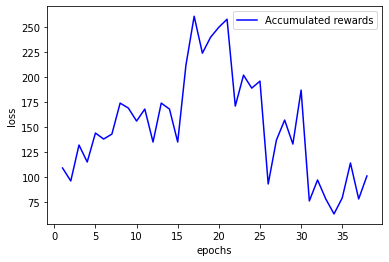

384600it [34:27, 186.02it/s, total reward=5802.0]                            


In [6]:
simulator = Simulator(model=model,
                     env=env,
                     train_every=int(128),
                     throttle=int(1e2),
                     memory_capacity=int(128),
                     plot_every=int(1e4))
simulator.run()

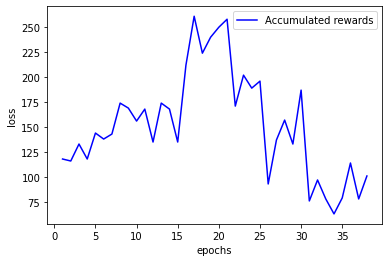

384600it [1:38:23, 65.14it/s, total reward=5835.0]                            


In [7]:
model = HybridLinUCBUER(
    n_arms=env.action_space.n,
    alpha=2,
    arm_feat_dim=len(env.get_user_state()[1][0]),
    user_feat_dim=len(env.get_user_state()[0]),
    return_list=False,
    memory_size=int(1e5),
    batch_size=128,
    epochs=40,
)
simulator = Simulator(model=model,
                     env=env,
                     train_every=int(128),
                     throttle=int(1e2),
                     memory_capacity=int(128),
                     plot_every=int(1e4))
simulator.run()

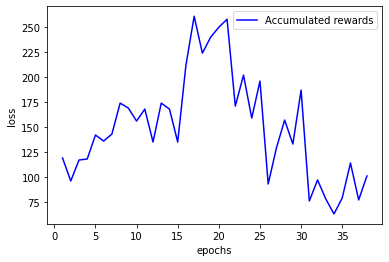

384600it [32:41, 196.10it/s, total reward=5757.0]                            


In [8]:
model = HybridLinUCBUER(
    n_arms=env.action_space.n,
    alpha=2,
    arm_feat_dim=len(env.get_user_state()[1][0]),
    user_feat_dim=len(env.get_user_state()[0]),
    return_list=False,
    memory_size=int(1e4),
    batch_size=128,
    epochs=10,
)
simulator = Simulator(model=model,
                     env=env,
                     train_every=int(128),
                     throttle=int(1e2),
                     memory_capacity=int(128),
                     plot_every=int(1e4))
simulator.run()